In [1]:
# ML_in_Finance-Deep-Classifiers
# Author: Matthew Dixon
# Version: 1.0 (24.7.2019)
# License: MIT
# Email: matthew.dixon@iit.edu
# Notes: tested on Mac OS X with Python 3.6.9 and the following packages:
# numpy=1.18.1, keras=2.3.1, tensorflow=2.0.0, scikit-learn=0.22.1, matplotlib=3.1.3
# Citation: Please cite the following reference if this notebook is used for research purposes:
# Dixon M.F., Halperin I. and P. Bilokon, Machine Learning in Finance: From Theory to Practice, Springer Graduate textbook Series, 2020. 

In [1]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
%matplotlib inline

# Overview

This notebook demonstrates the configuration and properties of feed forward neural networks. We will investigate how the perceptron units transform the input space. Specifically, we shall study the fitted weights and plot the separating hyperplanes, starting with no hidden layers, adding a hidden layer and then two hidden layers. We shall also observe the effect of changing the number of perceptron units in a layer.



# Preliminaries

##  Load the standard dataset and other preliminaries

The half-moons dataset is a classic classification problem consisting of two classes arranged in arcs, overlapping in each of the input space's two dimensions.

Note that we shall not partition the data into training and testing sets, since our goal is to understand how adding hidden layers transforms the input space, not to evaluate the models' classification performance.

In [2]:
X, Y = make_moons(n_samples=100, noise=0)

In [3]:
colors = np.array(['#377eb8', '#ff7f00'])

## Function definitions

Define the baseline neural network binary classifier without a hidden layer (i.e. a logit model)

In [4]:
def create_logit():
    # Create model
    model = Sequential()
    # Add the only layer, transforming the 2D input to the 1D output
    model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='sigmoid')) 
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

This function will display the decision boundary for the model, over the region
spanned by its inputs

In [5]:
def plot_decision_surface(X, model, h):
    # Get the upper and lower bounds of the two input dimensions
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    
    # Create the mesh over the input space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Quantise the model output to the integers 0 & 1
    g_pred = np.array(y_pred > 0.5, dtype=np.integer)
    
    # Plot the inputs and decision boundary on the input space
    plt.scatter(xx.ravel(), yy.ravel(), s=10, color=colors[g_pred.ravel()])    
    plt.scatter(X[:, 0], X[:, 1], s=30, color=colors[Y], edgecolors='black')
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    
    return plt

Fix NumPy and TensorFlow's random seeds for reproducibility

In [6]:
seed = 56
np.random.seed(seed)
tf.random.set_seed(seed)

## Part 1a: Evaluate the logit model

First we use the helper function we defined above to create the model, and fit it to the training data

In [7]:
model = create_logit()
model.fit(X, Y, epochs=300, batch_size=1, verbose=1)

Epoch 1/300


/Users/sibivishtan/anaconda3/envs/learning_dl/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.6703 - loss: 0.6851 
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.7849 - loss: 0.6610
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8167 - loss: 0.6385
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8428 - loss: 0.6176
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8404 - loss: 0.5979
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8404 - loss: 0.5796
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8490 - loss: 0.5625
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.8490 - loss: 0.5465
Epoch 9/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8490 - loss: 0.5316
Epoch 10/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8543 - loss: 0.5176
Epoch 11/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8543 - loss: 0.5045
Epoch 12/300
100/100 ━━━━━━━━━

## Predict classes of training points

We can now predict the class label for each of the inputs in `X`

In [8]:
y_pred = model.predict(X)
# Assigning outputs below 0.5 to class 0; above to class 1
g_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## Analysis of the logit model

We replicate the neural network layer: multiplying the input by the weights, adding the bias, and applying the activation function. We compare the result with the Keras output to verify that they are the same

In [9]:
def logit(x):
    return 1 / (1 + np.exp(-x))

In [10]:
W1, b1 = model.layers[0].get_weights()

In [11]:
for i in range(0, len(X)):
    x = X[i]
    y_hat = logit(np.matmul(np.transpose(W1), x) + b1)
    print(y_hat, y_pred[i])

[0.01193343] [0.01193343]
[0.985562] [0.985562]
[0.76500803] [0.76500803]
[0.74724199] [0.747242]
[0.23334517] [0.23334514]
[0.9307789] [0.9307789]
[0.01525749] [0.0152575]
[0.88228505] [0.88228506]
[0.99004273] [0.99004275]
[0.80623637] [0.8062363]
[0.98543077] [0.9854308]
[0.36007465] [0.3600747]
[0.02608389] [0.02608389]
[0.96570962] [0.9657096]
[0.44237692] [0.4423769]
[0.1673554] [0.16735537]
[0.00916084] [0.00916084]
[0.14227872] [0.14227872]
[0.12536632] [0.12536633]
[0.61007017] [0.6100702]
[0.94585153] [0.9458515]
[0.69777297] [0.697773]
[0.99015857] [0.99015856]
[0.37046817] [0.3704682]
[0.02122829] [0.02122829]
[0.98715045] [0.98715043]
[0.85012482] [0.8501248]
[0.98911996] [0.98911995]
[0.08426095] [0.08426094]
[0.10738143] [0.10738143]
[0.5274297] [0.5274297]
[0.01330856] [0.01330855]
[0.99005817] [0.9900582]
[0.01804356] [0.01804356]
[0.0640848] [0.06408478]
[0.05093889] [0.05093888]
[0.10940328] [0.10940327]
[0.0100261] [0.01002609]
[0.82081597] [0.820816]
[0.03214762] [

## Plot the separating hyperplanes

Let's construct the separating hyperplane from the equation of the line

In [12]:
x_min = min(X[:,0])
x_max = max(X[:,0])

y1 = -(b1 + W1[0]*x_min) / W1[1]
y2 = -(b1 + W1[0]*x_max) / W1[1]

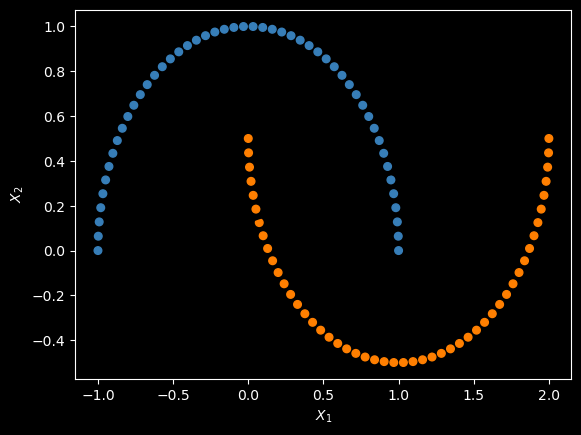

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors[Y])
plt.plot([x_min, x_max], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$');

We can also simply use our plotting function above to identify the mislabelled points.

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


/var/folders/1g/0mj97r555d15d54dx2257j7m0000gn/T/ipykernel_67673/1796532802.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  g_pred = np.array(y_pred > 0.5, dtype=np.integer)


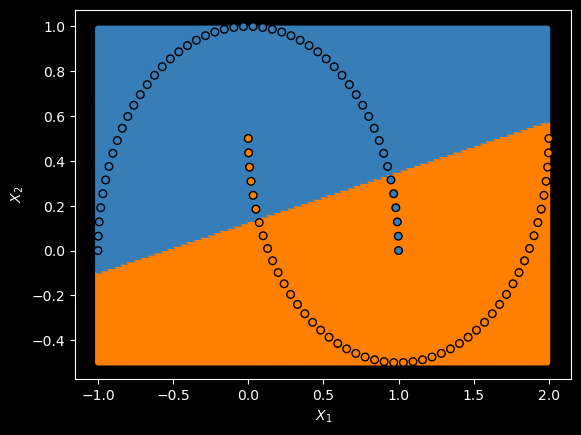

In [14]:
plot_decision_surface(X, model, 0.01);

## Part 1b: Analysis of a FFWD Neural Network with one hidden layer

Let's now repeat the analysis now using one hidden layer.

In [15]:
def create_model_h1():
    # Create model
    model = Sequential()
    
    # Add the hidden layer
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu'))
    # Add the output layer
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model_h1 = create_model_h1()
model_h1.fit(X, Y, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.3463 - loss: 0.6935     
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.5395 - loss: 0.6912
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.5487 - loss: 0.6863
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.6677 - loss: 0.6776
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.7973 - loss: 0.6656
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7973 - loss: 0.6514
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8127 - loss: 0.6360
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8196 - loss: 0.6203
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8178 - loss: 0.6049
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8358 - loss: 0.5902
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8358 - loss: 0.5763
Epoch 12/200
1

Extract the weights and calculate the hidden layer's activations for each of the data points.

In [17]:
Z1 = [0]*len(X)
Z2 = [0]*len(X)
W1, b1 = model_h1.layers[0].get_weights()
W2, b2 = model_h1.layers[1].get_weights()

for i in range(len(X)):
    x = X[i]
    Z1[i], Z2[i] = np.maximum(np.matmul(np.transpose(W1), x) + b1, 0)

Let's view the input after transformation through the hidden layer.

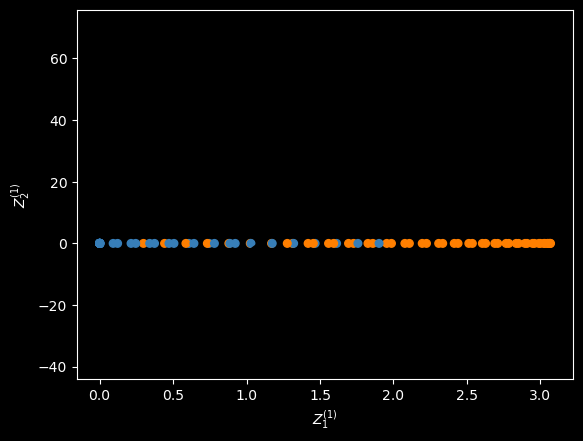

In [18]:
plt.scatter(Z1, Z2, s=30, color=colors[Y])

W2 = W2.ravel()
z1_min = min(Z1)
z1_max = max(Z1)

z1 = -(b2 + W2[0]*z1_min) / W2[1]
z2 = -(b2 + W2[0]*z1_max) / W2[1]

plt.plot([z1_min, z1_max], [z1, z2], color='k', linestyle='-', linewidth=2)
plt.xlabel(r'$Z^{(1)}_1$')
plt.ylabel(r'$Z^{(1)}_2$');

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


/var/folders/1g/0mj97r555d15d54dx2257j7m0000gn/T/ipykernel_67673/1796532802.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  g_pred = np.array(y_pred > 0.5, dtype=np.integer)


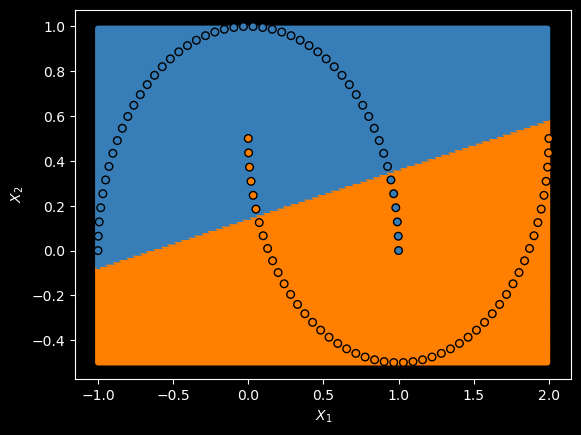

In [19]:
plot_decision_surface(X, model_h1, 0.01);

## Part 1c: Analysis of FFWD Neural Network Model with Two Hidden Layers

Again, we define a function for creating the model, this time with two hidden layers containing two units each.

In [20]:
def create_model_h2():
    # Create model
    model = Sequential()
    
    # Add hidden layer 1...  
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu')) 
    # ...hidden layer 2...
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))              
    # ...and the output layer.
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))           
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
model_h2 = create_model_h2()
model_h2.fit(X, Y, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.4711 - loss: 0.6933     
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5262 - loss: 0.6932
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5262 - loss: 0.6932
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5231 - loss: 0.6932
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5229 - loss: 0.6933
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.5195 - loss: 0.6933
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5195 - loss: 0.6933
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.4680 - loss: 0.6933   
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4680 - loss: 0.6933   
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.4680 - loss: 0.6933   
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.4680 - loss: 0.6933  
Epo

Extract the weights and calculate the second hidden layer's activations for each of the data points.

In [23]:
Z1 = [0]*len(X)
Z2 = [0]*len(X)

W1, b1 = model_h2.layers[0].get_weights()
W2, b2 = model_h2.layers[1].get_weights()
W3, b3 = model_h2.layers[2].get_weights()

for i in range(len(X)):
    x = X[i]
    z = np.maximum(np.matmul(np.transpose(W1), x) + b1, 0)
    Z1[i], Z2[i] = np.maximum(np.matmul(np.transpose(W2), z) + b2, 0)

Let's view the input after transformation through hidden layer 1 and 2.

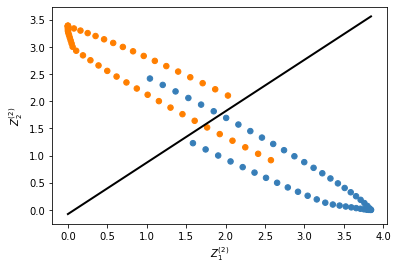

In [24]:
plt.scatter(Z1, Z2, s=30, color=colors[Y])

W3 = W3.ravel()
z1_min = min(Z1)
z1_max = max(Z1)

z1 = -(b3 + W3[0]*z1_min) / W3[1]
z2 = -(b3 + W3[0]*z1_max) / W3[1]

plt.plot([z1_min, z1_max], [z1, z2], color='k', linestyle='-', linewidth=2)
plt.xlabel(r'$Z^{(2)}_1$')
plt.ylabel(r'$Z^{(2)}_2$');

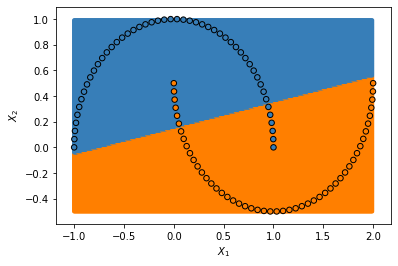

In [25]:
plot_decision_surface(X, model_h2, 0.01);

## Model H1: many hidden units

This time we observe the effect of a hidden layer with many neurons

In [26]:
def create_model_h1_many():
    # create model
    model = Sequential()
    
    # Add a hidden layer with 75 units
    model.add(Dense(75, input_dim=2, kernel_initializer='normal', activation='relu')) 
    # And again, a single output node
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
model_h1_many = create_model_h1_many()
model_h1_many.fit(X, Y, epochs=300, batch_size=1, verbose=1)

Epoch 1/300
100/100 [==============================] - 2s 16ms/step - loss: 0.6596 - accuracy: 0.8000
Epoch 2/300
100/100 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.8000
Epoch 3/300
100/100 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8300
Epoch 4/300
100/100 [==============================] - 1s 6ms/step - loss: 0.3538 - accuracy: 0.8400
Epoch 5/300
100/100 [==============================] - 1s 11ms/step - loss: 0.3184 - accuracy: 0.8500
Epoch 6/300
100/100 [==============================] - 1s 12ms/step - loss: 0.3010 - accuracy: 0.8500
Epoch 7/300
100/100 [==============================] - 1s 13ms/step - loss: 0.2887 - accuracy: 0.8600
Epoch 8/300
100/100 [==============================] - 1s 11ms/step - loss: 0.2781 - accuracy: 0.8700
Epoch 9/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2726 - accuracy: 0.8700
Epoch 10/300
100/100 [==============================] - 1s 15ms/step - loss: 0.2655 -

100/100 [==============================] - 1s 12ms/step - loss: 0.2184 - accuracy: 0.8900
Epoch 81/300
100/100 [==============================] - 1s 11ms/step - loss: 0.2171 - accuracy: 0.8900
Epoch 82/300
100/100 [==============================] - 1s 11ms/step - loss: 0.2165 - accuracy: 0.9000
Epoch 83/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2170 - accuracy: 0.8800
Epoch 84/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2174 - accuracy: 0.8900
Epoch 85/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2154 - accuracy: 0.8900
Epoch 86/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2183 - accuracy: 0.8800
Epoch 87/300
100/100 [==============================] - 1s 11ms/step - loss: 0.2128 - accuracy: 0.8900
Epoch 88/300
100/100 [==============================] - 1s 11ms/step - loss: 0.2159 - accuracy: 0.8900
Epoch 89/300
100/100 [==============================] - 1s 12ms/step - loss: 0.2153 - 

100/100 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9300
Epoch 160/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9200
Epoch 161/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.9100
Epoch 162/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9300
Epoch 163/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1613 - accuracy: 0.9200
Epoch 164/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9200
Epoch 165/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1603 - accuracy: 0.9200
Epoch 166/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9300
Epoch 167/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9200
Epoch 168/300
100/100 [==============================] - 0s 3ms/step - loss: 0.1591 - a

100/100 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9900
Epoch 239/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 240/300
100/100 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9900
Epoch 241/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9800
Epoch 242/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9900
Epoch 243/300
100/100 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9900
Epoch 244/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9900
Epoch 245/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9900
Epoch 246/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9900
Epoch 247/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0547 - a

Get the weights and calculate the hidden layer's activations for each point.

In [44]:
Z1 = [0]*len(X)
Z2 = [0]*len(X)
W1, b1 = model_h1_many.layers[0].get_weights()
W2, b2 = model_h1_many.layers[1].get_weights()

for i in range(len(X)):
    x = X[i]
    hidden_layer_activations = np.maximum(np.matmul(np.transpose(W1), x) + b1, 0)
    Z1[i] = hidden_layer_activations[0]
    Z2[i] = hidden_layer_activations[1]

Note that in this example the dimensionality of Z is much higher than 2. For each input point, we are simply plotting the activations of two of the hidden layer's 75 neurons. 

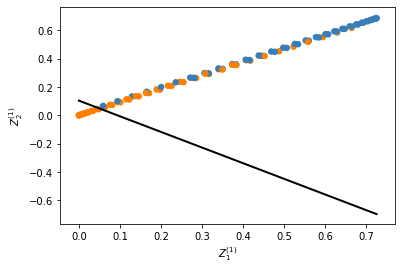

In [45]:
plt.scatter(Z1, Z2, s=30, color=colors[Y])

W2 = W2.ravel()
z1_min = min(Z1)
z1_max = max(Z1)

z1 = -(b2 + W2[0]*z1_min) / W2[1]
z2 = -(b2 + W2[0]*z1_max) / W2[1]

plt.plot([z1_min, z1_max], [z1, z2], color='k', linestyle='-', linewidth=2)
plt.xlabel(r'$Z^{(1)}_1$')
plt.ylabel(r'$Z^{(1)}_2$');

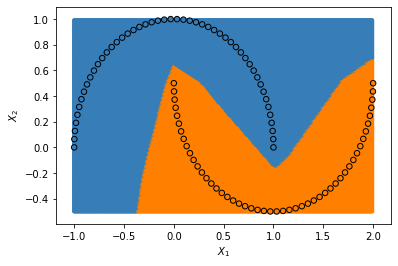

In [30]:
plot_decision_surface(X, model_h1_many, 0.01);

## Part 2: How many hidden units?

We can also study the effect of changing the number if perceptron units. Staying with the two layer model and repeating the analysis above...

In [31]:
def create_model_h2_many():
    # Create model
    model = Sequential()
    
    # Add two hidden layers, with 50 units in the first...
    model.add(Dense(50, input_dim=2, kernel_initializer='normal', activation='relu'))
    # ...two in the second...
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    # ...and a single output
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model_h2_many = create_model_h2_many()
model_h2_many.fit(X, Y, epochs=300, batch_size=1, verbose=1)

Epoch 1/300
100/100 [==============================] - 2s 20ms/step - loss: 0.6879 - accuracy: 0.6800
Epoch 2/300
100/100 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.8200
Epoch 3/300
100/100 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.8300
Epoch 4/300
100/100 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.8500
Epoch 5/300
100/100 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.8600
Epoch 6/300
100/100 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8500
Epoch 7/300
100/100 [==============================] - 0s 4ms/step - loss: 0.3023 - accuracy: 0.8700
Epoch 8/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2909 - accuracy: 0.8700
Epoch 9/300
100/100 [==============================] - 1s 5ms/step - loss: 0.2888 - accuracy: 0.8700
Epoch 10/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2794 - accur

100/100 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.8800
Epoch 82/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.8900
Epoch 83/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.8900
Epoch 84/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.8900
Epoch 85/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.8900
Epoch 86/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.8700
Epoch 87/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9000
Epoch 88/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.8800
Epoch 89/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.8900
Epoch 90/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 

100/100 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.8700
Epoch 161/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.8800
Epoch 162/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.8800
Epoch 163/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.8900
Epoch 164/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.8900
Epoch 165/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.8800
Epoch 166/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.8900
Epoch 167/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.8900
Epoch 168/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.8800
Epoch 169/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2241 - a

100/100 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.8600
Epoch 240/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.8900
Epoch 241/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.8900
Epoch 242/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2236 - accuracy: 0.8800
Epoch 243/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.8700
Epoch 244/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.8900
Epoch 245/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.8800
Epoch 246/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2221 - accuracy: 0.8800
Epoch 247/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.8800
Epoch 248/300
100/100 [==============================] - 0s 4ms/step - loss: 0.2216 - a

Get the trained weights and use them to calculate the output of the second hidden layer:

In [33]:
Z1 = [0]*len(X)
Z2 = [0]*len(X)

W1, b1 = model_h2_many.layers[0].get_weights()
W2, b2 = model_h2_many.layers[1].get_weights()
W3, b3 = model_h2_many.layers[2].get_weights()

for i in range(len(X)):
    x = X[i]
    z = np.maximum(np.matmul(np.transpose(W1), x) + b1, 0)
    Z1[i], Z2[i] = np.maximum(np.matmul(np.transpose(W2), z) + b2, 0)

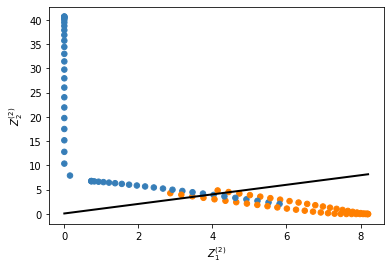

In [34]:
plt.scatter(Z1, Z2, s=30, color=colors[Y])

W3 = W3.ravel()
z1_min = min(Z1)
z1_max = max(Z1)

z1 = -(b3 + W3[0]*z1_min) / W3[1]
z2 = -(b3 + W3[0]*z1_max) / W3[1]

plt.plot([z1_min, z1_max], [z1, z2], color='k', linestyle='-', linewidth=2)
plt.xlabel(r'$Z^{(2)}_1$')
plt.ylabel(r'$Z^{(2)}_2$');

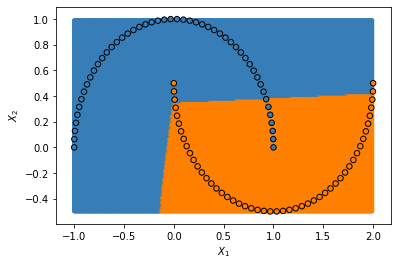

In [35]:
plot_decision_surface(X, model_h2_many, 0.01);

## Questions/Exercises

1) Did we need more than one hidden layer to perfectly classify? If not, why might multiple hidden layers be useful for other datasets?

2) Why not use a very large number of neurons since it's clear that the classification accuracy improves with more degrees of freedom?

3) Repeat the plotting of the hyperplane, in Part 1b, only without the ReLU function (i.e. max(x, 0) function). Why is an activation function needed?